# Nama : Fitra Noviarji
# Nim : 2109106017
# Posttest 6

In [23]:
import pandas as pd
import seaborn as sns
import warnings

# Menampilkan Dataset

In [24]:
dataset = pd.read_csv('posttest 6/healthcare-dataset-stroke-data.csv')
dataset.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


# subset & Data Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
df_subset = dataset[['age', 'hypertension']]

In [27]:
ss = StandardScaler()

In [28]:
x_scaled = ss.fit_transform(df_subset)

# K-Means Clusting

In [29]:
from sklearn.cluster import KMeans

In [30]:
model_kmeans = KMeans(n_clusters = 3)

In [31]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [32]:
labels = model_kmeans.labels_

In [33]:
print(labels)

[2 2 2 ... 0 2 2]


# Buat Cross_Tab untuk membandingkan antar cluster

In [34]:
df_kmeans = pd.DataFrame({'labels': labels,'heart_disease': dataset.heart_disease})

In [35]:
ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['heart_disease'])

In [36]:
print(ct1)

heart_disease     0    1
labels                  
0              2199    3
1               434   64
2              2201  209


# Tampilkan Visualisasi Model

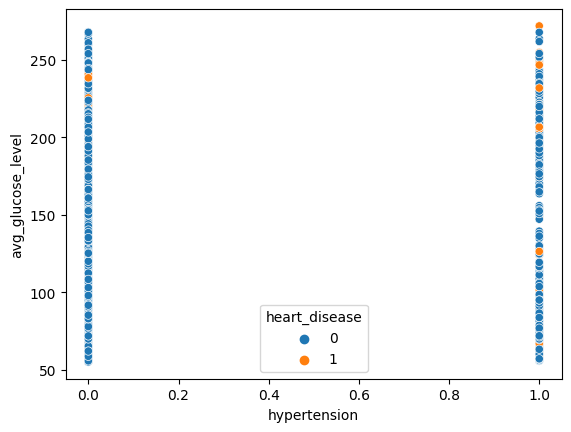

In [37]:
df_aktual = dataset[["hypertension", "avg_glucose_level", "heart_disease"]]
sns.scatterplot(x = "hypertension", y = "avg_glucose_level", data = df_aktual, hue = "heart_disease")
plt.show()